In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [27]:
# import dataset and divide it into data and target

iris= datasets.load_iris()
x= iris.data[:,2:4] #data
y= iris.target #targets are labels 

In [28]:
#create the model 
#.fit trains the model

C= 1.0 #SVM helps fit the model 
svc = svm.SVC(kernel="linear",C=C,gamma="auto").fit(x,y) # SVC-classification, defining the configuration of the model, .fit to train


In [29]:
# create a mesh to plot the samples
#define the x and y axis by min and max

x_min,x_max = x[:,0].min() -0.5, x[:,0].max() +0.5
y_min,y_max = x[:,1].min() -0.5, x[:,1].max() +0.5

h= (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h)) #h is how each axis counts, h=2.. axis 2,4,6,8


C:\Users\user\AppData\Local\Temp\ipykernel_8420\259817429.py:6: UserWarning: The following kwargs were not used by contour: 'cmp'
  plt.contour(xx,yy,z,cmp= plt.cm.Paired, alpha= 0.8) #countour helps plot the boundaries


<function matplotlib.pyplot.show(close=None, block=None)>

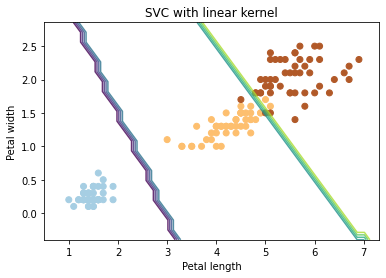

In [30]:
#showing the boundaires that the model crerated 
plt.subplot(111)
z = svc.predict(np.c_[xx.ravel(),yy.ravel()]) #predicting the values that the mesh grid created
z = z.reshape(xx.shape)

plt.contour(xx,yy,z,cmp= plt.cm.Paired, alpha= 0.8) #countour helps plot the boundaries
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.xlim(xx.min(),xx.max())
plt.title("SVC with linear kernel")
plt.show

In [31]:
#dividing data into training and testing
#training the newly divised data

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20, random_state=42)

svc = svm.SVC(kernel="sigmoid",C=1, gamma="auto").fit(x_train,y_train) #trainig data with coresponding labels 

In [32]:
# evaluating the performance of the model using testing set

class_result= svc.predict(x_test)  #.predict use traing model with new data

print(metrics.classification_report(class_result,y_test))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46        30
           2       0.00      0.00      0.00         0

    accuracy                           0.30        30
   macro avg       0.33      0.10      0.15        30
weighted avg       1.00      0.30      0.46        30



C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix, without normalization
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]


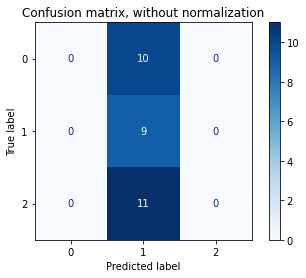

In [35]:
title_option = [("Confusion matrix, without normalization",None)]

for title, normalize in title_option:
    disp = plot_confusion_matrix(svc,x_test,y_test, cmap=plt.cm.Blues, normalize = normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

In [45]:
# Working with Self Organizing Maps
from sklearn_som.som import SOM

som_model= SOM(m=3, n=1, dim =2) 
som_model.fit(x_train)

In [47]:
result_som= som_model.predict(x_test)

#results: show first sample as 2nd class

In [48]:
print(metrics.classification_report(result_som,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.33      1.00      0.50         3
           2       1.00      0.65      0.79        17

    accuracy                           0.80        30
   macro avg       0.78      0.88      0.76        30
weighted avg       0.93      0.80      0.83        30

